In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib.colors import TwoSlopeNorm
import cartopy.crs as ccrs # Cartopy allows us to add maps to the plots
import xarray_extras # This has some bonus xarray abilities, such as export to csv
import os
%matplotlib inline

In [2]:
def load_field(name):
    if name == "wsgsmax":
        base_path = "~/UKCP18/ukcp-other/wind-emulation-data"
    else:
        base_path = "~/UKCP18/day/"
    pattern = os.path.join(base_path, f"{name}*.nc")
    dataset = xr.open_mfdataset(pattern)
    return dataset, dataset[name]

<xarray.DataArray 'wsgsmax' (time: 36000, ht: 1, projection_y_coordinate: 112, projection_x_coordinate: 82)>
dask.array<concatenate, shape=(36000, 1, 112, 82), dtype=float32, chunksize=(3600, 1, 112, 82), chunktype=numpy.ndarray>
Coordinates:
  * time                     (time) object 1980-12-01 12:00:00 ... 2080-11-30...
  * projection_x_coordinate  (projection_x_coordinate) float64 -2.1e+05 ... 7...
  * projection_y_coordinate  (projection_y_coordinate) float64 -1.02e+05 ... ...
  * ht                       (ht) float32 -1.0
Attributes:
    long_name:     Maximum wind gust at 10m
    units:         m s-1
    grid_mapping:  crs
    cell_methods:  t: maximum t: mean
    source:        Unified Model Output (Vn10.6):
    name:          field1694
    title:         Maximum wind gust at 10m
    date:          01/12/78
    time:          00:00
    north_pole:    [198.    39.25]


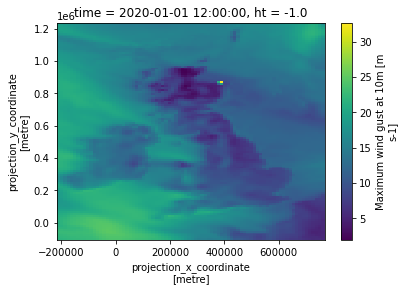

In [21]:
wsgsmax_pattern = '~/UKCP18/ukcp-other/wind-emulation-data/wsgsmax_rcp85_land-rcm_uk_12km_01_day*.nc'
_, wsgsmax = load_field("wsgsmax")
print(wsgsmax)
wsgsmax.sel(time='20200101').plot()

Plot absolute correlation coefficients between max gust speed and the other fields.

I'm not actually sure if this makes sense for time series data, but perhaps it's a good start.

Loading and plotting clt
Loading and plotting hurs
Loading and plotting huss
Loading and plotting pr
Loading and plotting prsn


/shared/groups/jrole001/geog0121/envs/jupyter_japsy/lib/python3.7/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


Loading and plotting psl
Loading and plotting rls
Loading and plotting rss
Loading and plotting sfcWind
Loading and plotting snw


/shared/groups/jrole001/geog0121/envs/jupyter_japsy/lib/python3.7/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


Loading and plotting uas
Loading and plotting vas


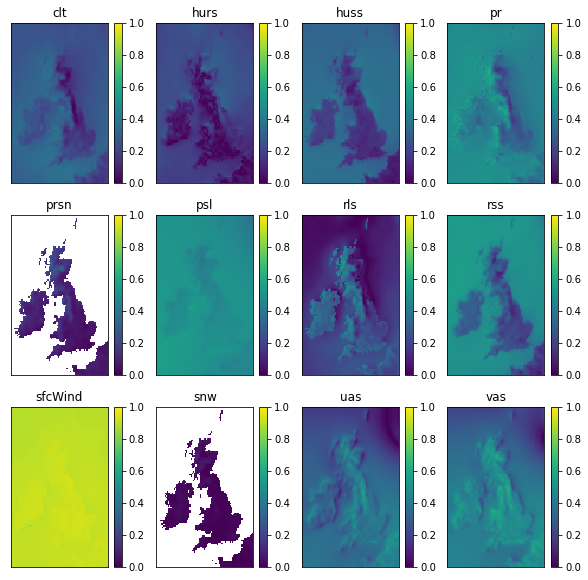

In [43]:
def pearson_correlation_coeff(x, y):
    # Based on the final form of r_{xy} here:
    # https://en.wikipedia.org/wiki/Pearson_correlation_coefficient#For_a_sample
    numerator = (x * y).sum("time") - n * x.mean("time") * y.mean("time")
    denominator = (n - 1) * x.std("time") * y.std("time")
    return numerator / denominator

base_field_name = "wsgsmax"
_, base_field = load_field(base_field_name)
base_data = base_field.values
n = base_data.shape[0]
other_field_names = ["clt", "hurs", "huss", "pr", "prsn", "psl", "rls", "rss", "sfcWind", "snw",
                     "uas", "vas", "tas", "tasmax", "tasmin"]
# other_field_names = ["clt", "hurs", "sfcWind", "snw"]

cols = min(len(other_field_names), 4)
rows = len(other_field_names) // cols
fig, axes = plt.subplots(rows, cols, figsize=(10, 10))

for ax, other_field_name in zip(axes.flatten(), other_field_names):
    print(f"Loading and plotting {other_field_name}")
    _, other_field = load_field(other_field_name)
    other_data = other_field.values.reshape(base_data.shape)
    coeffs = pearson_correlation_coeff(base_field, other_field)
    abs(coeffs).plot(ax=ax, vmin=0, vmax=1.0)
    
    ax.set_title(other_field_name)
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.set_xticks([])
    ax.set_yticks([])